# 15. 다중 클래스 분류 문제

Rock Paper Scssors Datasets은 2,892개의 가위, 바위, 보 손동작 제스처 이미지를 포함하는 데이터셋입니다.

다양한 손동작, 인종, 나이, 성별의 가위, 바위, 보 이미지를 포함하며, 이미지에 해당하는 레이블을 포함합니다.

이미지들은 모두 CGI(Computer-Generated Imagery) 기술을 이용해서 생성되었습니다.

아래의 주소에서 훈련용 이미지와 테스트용 이미지를 다운받을 수 있습니다.

```
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
```

모든 이미지는 흰색 배경을 가지며, 24비트 색상의 300*300 픽셀로 이루어져 있습니다.

이 페이지에서는 세 개의 클래스를 갖는 데이터셋을 분류하는 방법에 대해서 소개합니다.

## 데이터셋 다운로드하기

Google Colab 환경에서 아래의 명령어를 실행하면, tmp 폴더에 Rock Paper Scssors Datasets이 다운로드 됩니다.

In [4]:
# 훈련용 이미지
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

--2022-04-12 09:50:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   117MB/s    in 1.6s    

2022-04-12 09:50:48 (117 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



훈련용 이미지 데이터셋을 다운로드 합니다.


In [5]:
# 테스트용 이미지
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /tmp/rps-test-set.zip

--2022-04-12 09:50:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M   132MB/s    in 0.2s    

2022-04-12 09:50:48 (132 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



테스트용 이미지 데이터셋을 다운로드 합니다.

## 압축 풀기

In [6]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

os 라이브러리를 통해 파일시스템에 접근할 수 있습니다.

zipfile 라이브러리의 ZipFile 클래스로 ZIP파일을 연 후에

extractall()메서드를 이용해서 tmp 폴더에 압축을 풉니다.

## 경로 지정하기

In [7]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print('Total number of training rock images:', len(rock_files))
print('Total number of training paper images:', len(paper_files))
print('Total number of training scissors images:', len(scissors_files))

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

Total number of training rock images: 840
Total number of training paper images: 840
Total number of training scissors images: 840
['rock06ck02-014.png', 'rock06ck02-039.png', 'rock05ck01-009.png', 'rock03-054.png', 'rock06ck02-073.png', 'rock02-019.png', 'rock03-036.png', 'rock05ck01-008.png', 'rock04-033.png', 'rock07-k03-007.png']
['paper03-081.png', 'paper01-058.png', 'paper03-083.png', 'paper06-102.png', 'paper02-095.png', 'paper04-103.png', 'paper01-072.png', 'paper03-116.png', 'paper01-089.png', 'paper03-037.png']
['testscissors01-078.png', 'scissors04-074.png', 'scissors04-099.png', 'scissors02-094.png', 'testscissors03-042.png', 'testscissors02-112.png', 'testscissors03-071.png', 'scissors04-064.png', 'testscissors01-004.png', 'scissors02-113.png']


훈련에 사용되는 가위 바위 보 이미지의 경로를 각각 지정해줍니다.

각 클래스 별로 840개의 훈련용 이미지가 있음을 알 수 있습니다.

## 이미지 확인하기

/tmp/rps/rock/rock06ck02-014.png


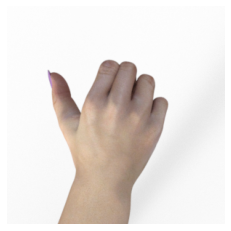

/tmp/rps/rock/rock06ck02-039.png


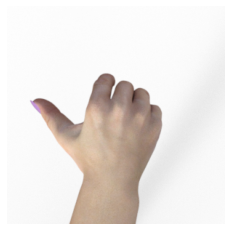

/tmp/rps/paper/paper03-081.png


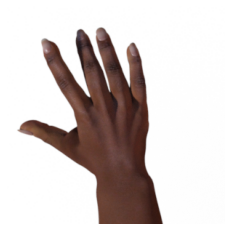

/tmp/rps/paper/paper01-058.png


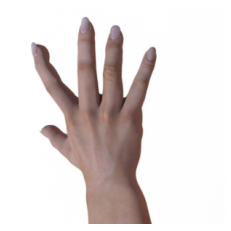

/tmp/rps/scissors/testscissors01-078.png


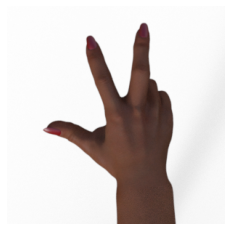

/tmp/rps/scissors/scissors04-074.png


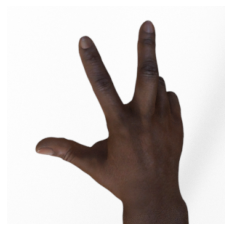

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  print(img_path)
  img = mpimg.imread(img_path) # 이미지 경로 읽기
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Matplotlib 라이브러리를 이용해서 각 클래스 별로 두 개의 이미지를 출력합니다.

In [15]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/tmp/rps'
training_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = '/tmp/rps-test-set'
validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(150,150), class_mode='categorical', batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(150,150), class_mode='categorical', batch_size=126)

model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = tf.nn.relu, input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, validation_data = validation_generator, epochs = 25, steps_per_epoch = 20, verbose = 1, validation_steps = 3)

model.save('rps.h5')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                     

25회 에포크의 훈련을 진행합니다.

## 훈련 결과 확인하기

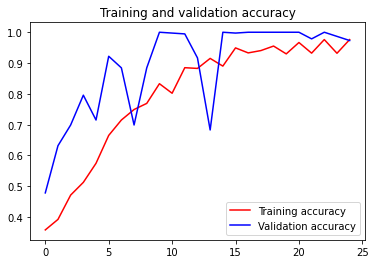

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()